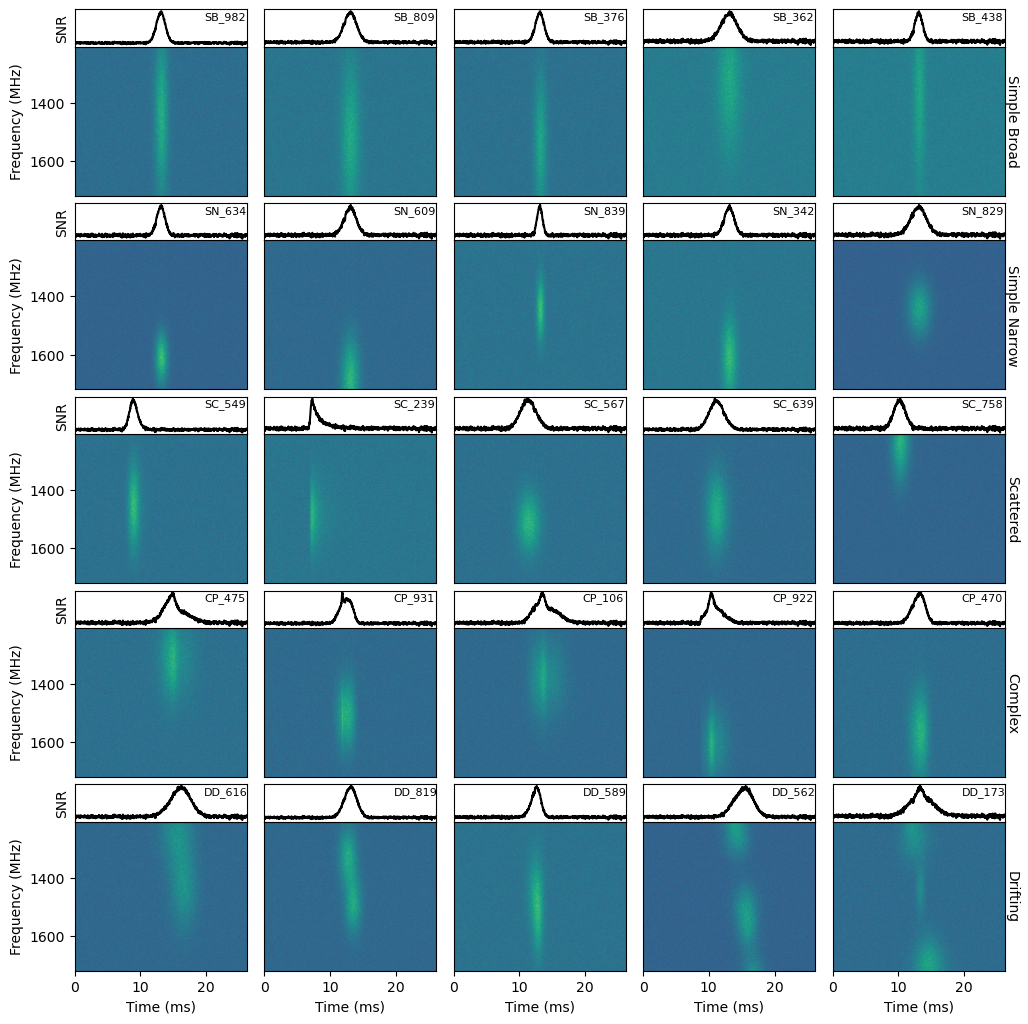

In [83]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# Function to load a burst from a given directory
def load_burst_from_directory(directory, csv_file):
    # List all the numpy array files in the directory
    file_list = [f for f in os.listdir(directory) if f.endswith(".npy")]
    bursts = []

    # # Read the CSV file into a DataFrame
    # df = pd.read_csv(os.path.join(directory, csv_file))

    # # Sort by scattering time
    # top_bursts = df.sort_values(by="tau", ascending=False)

    for file in file_list:
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(directory, file))
        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)
        snr = np.max(lightcurve)
        if snr > 30:
            bursts.append((dynamic_spectra_w_pulse, lightcurve, snr, file))

    return bursts

# List of directories containing the saved data and their corresponding CSV files
directories = ["simulated_simple_broad_bursts_v4", "simulated_simple_narrow_bursts_v4", "simulated_scattered_bursts_v4", "simulated_complex_bursts_v4", "simulated_drifting_bursts_v4"]
csvs = ["simulated_simple_broad_bursts_v4.csv", "simulated_simple_narrow_bursts_v4.csv", "simulated_scattered_bursts_v4.csv", "simulated_complex_bursts_v4.csv", "simulated_drifting_bursts_v4.csv"]
class_labels = ["Simple Broad", "Simple Narrow", "Scattered", "Complex", "Drifting"]
class_acronyms = ["SB", "SN", "SC", "CP", "DD"]

fig, axs = plt.subplots(5, 5, figsize=(12, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, (directory, csv_file, label, acronym) in enumerate(zip(directories, csvs, class_labels, class_acronyms)):
    bursts = load_burst_from_directory(directory, csv_file)
    for j in range(5):
        if j < len(bursts):
            dynamic_spectra_w_pulse, lightcurve, _, file = bursts[j]
            time_step = 0.0000256  # Default time step in seconds
            extent = [0, dynamic_spectra_w_pulse.shape[0] * time_step * 1000, 1208, 1720]
            ax = axs[i, j]
            ax2 = ax.inset_axes([0, 1, 1, 0.25])
            im = ax.imshow(dynamic_spectra_w_pulse.T, aspect="auto", cmap="viridis", extent=extent)
            ax.invert_yaxis()
            
            # Add x-axis labels only to the 5 bottom plots
            if i == 4:
                ax.set_xlabel("Time (ms)")
                ax.tick_params(axis='x', bottom=True, top=False)
            else:
                ax.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
            
            # Add y-axis labels only to the 5 leftmost plots
            if j == 0:
                ax.set_ylabel("Frequency (MHz)")
                ax.tick_params(axis='y', left=True, right=False)
                ax2.set_ylabel("SNR")
            else:
                ax.tick_params(axis='y', left=False, right=False, labelleft=False)
                ax2.tick_params(left=False, labelleft=False)

            # Create a new subgrid for the lightcurve above the dynamic spectrum
            ax2.plot(np.arange(dynamic_spectra_w_pulse.shape[0]) * time_step * 1000, lightcurve, 'k')
            ax2.set_xlim(0, dynamic_spectra_w_pulse.shape[0] * time_step * 1000)  # Adjust the x-axis limit
            ax2.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

            # Add burst number and class acronym as labels
            label_text = f"{os.path.splitext(file)[0]}"
            ax2.text(0.75, 1.2, label_text, transform=ax.transAxes, va='center', fontsize=8)

        else:
            axs[i, j].axis('off')
    # Add labels to the right of each row
    axs[i, 4].text(1, 0.5, label, transform=axs[i, 4].transAxes, va='center', rotation=-90)

plt.show()


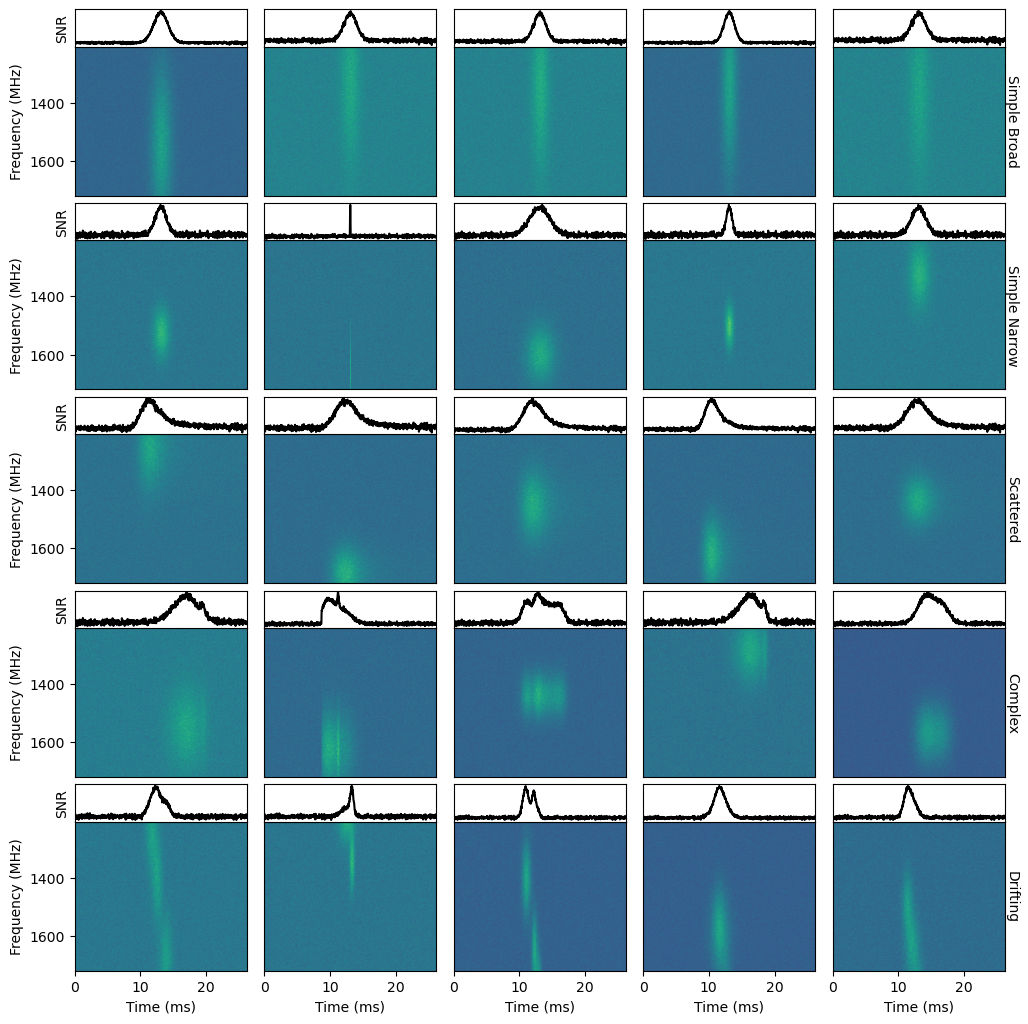

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# Function to load a burst from a given directory
def load_burst_from_directory(directory, csv_file):
    # List all the numpy array files in the directory
    file_list = [f for f in os.listdir(directory) if f.endswith(".npy")]
    bursts = []

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory, csv_file))

    # Sort by scattering time 
    top_bursts = df.sort_values(by="tau", ascending=False)

    # Create a list of burst filenames in the format "frb_{burstnumber}.npy"
    file_list = ["frb_" + str(burst_number) + ".npy" for burst_number in top_bursts.index]

    for file in file_list:
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(directory, file))
        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)
        snr = np.max(lightcurve)
        if snr > 20:
            bursts.append((dynamic_spectra_w_pulse, lightcurve, snr))

    return bursts

# List of directories containing the saved data and their corresponding CSV files
directories = ["simulated_simple_broad_bursts_v2", "simulated_simple_bursts_v2", "simulated_scattered_bursts_v2", "simulated_complex_bursts_v2", "simulated_drifting_bursts_v2"]
csvs = ["simulated_simple_broad_bursts_v2.csv", "simulated_simple_bursts_v2.csv", "simulated_scattered_bursts_v2.csv", "simulated_complex_bursts_v2.csv", "simulated_drifting_bursts_v2.csv"]
class_labels = ["Simple Broad", "Simple Narrow", "Scattered", "Complex", "Drifting"]

fig, axs = plt.subplots(5, 5, figsize=(12, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.3, wspace=0.1)

for i, (directory, csv_file, label) in enumerate(zip(directories, csvs, class_labels)):
    bursts = load_burst_from_directory(directory, csv_file)
    for j in range(5):
        if j < len(bursts):
            dynamic_spectra_w_pulse, lightcurve, _ = bursts[j]
            time_step = 0.0000256  # Default time step in seconds
            extent = [0, dynamic_spectra_w_pulse.shape[0] * time_step * 1000, 1208, 1720]
            ax = axs[i, j]
            ax2 = ax.inset_axes([0, 1, 1, 0.25])
            im = ax.imshow(dynamic_spectra_w_pulse.T, aspect="auto", cmap="viridis", extent=extent)
            ax.invert_yaxis()
            
            # Add x-axis labels only to the 4 bottom plots
            if i == 4:
                ax.set_xlabel("Time (ms)")
                ax.tick_params(axis='x', bottom=True, top=False)
            else:
                ax.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
            
            # Add y-axis labels only to the 4 leftmost plots
            if j == 0:
                ax.set_ylabel("Frequency (MHz)")
                ax.tick_params(axis='y', left=True, right=False)
                ax2.set_ylabel("SNR")
            else:
                ax.tick_params(axis='y', left=False, right=False, labelleft=False)
                ax2.tick_params(left=False, labelleft=False)

            # Create a new subgrid for the lightcurve above the dynamic spectrum
            ax2.plot(np.arange(dynamic_spectra_w_pulse.shape[0]) * time_step * 1000, lightcurve, 'k')
            ax2.set_xlim(0, dynamic_spectra_w_pulse.shape[0] * time_step * 1000)  # Adjust the x-axis limit
            ax2.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

        else:
            axs[i, j].axis('off')
    # Add labels to the right of each row
    axs[i, 4].text(1, 0.5, label, transform=axs[i, 4].transAxes, va='center', rotation=-90)

plt.show()
